In [1]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_root_and_name_tuple_list = [("dbnsfp", "sift"), ("dbnsfp", "polyphen2_HVAR"), ("dbnsfp", "cadd"), ("dbnsfp", "mvp"), ("dbnsfp", "metarnn"), ("dbnsfp", "revel"),
                                  ("tape_rao", "unirep"), ("tape_rao", "protbert"), ("sequnet_dunham", "sequnet"), 
                                  ("esm_rives", "esm1b_t33_650M_UR50S"), ("esm_rives", "esm1v_t33_650M_UR90S"), ("esm_rives", "esm2_t33_650M_UR50D"),
                                  ("bioembeddings_dallago", "plus_rnn"), 
                                  ("bioembeddings_dallago", "prottrans_bert_bfd"), ("bioembeddings_dallago", "prottrans_albert_bfd"),
                                  ("bioembeddings_dallago", "prottrans_xlnet_uniref100"), 
                                  ("bioembeddings_dallago", "prottrans_t5_bfd"), ("bioembeddings_dallago", "prottrans_t5_uniref50"), ("bioembeddings_dallago", "prottrans_t5_xl_u50"),
                                  ("vespa_marquet", "vespal"), 
                                  ("", "random_classifier"), ("", "conservation")]
models_smaller_means_damaging = ["sequnet", "sift"]

In [3]:
result_df = pd.read_csv(home_dir+f"models/aa_common/merged_predictions/popu_freq_analysis.csv", sep="\t")
result_df = result_df[~pd.isna(result_df["conservation_pred"])]  # taking df for only non-NAN values

result_df = result_df[(result_df["class"]!="Zero-population") & (result_df["class"]!="Singleton")]
# print(result_df.shape)
# print(result_df.columns)
print(result_df["class"].value_counts())

# n_samples = 10000
# common = result_df[result_df["class"]=="Common"].sample(n=min(n_samples, result_df[result_df["class"]=="Common"].shape[0]))
# rare = result_df[result_df["class"]=="Rare"].sample(n=n_samples)
# ultra_rare = result_df[result_df["class"]=="Ultra-rare"].sample(n=n_samples)
# # result_df = result_df[(result_df["class"]=="Common") | (result_df["class"]=="Rare") | (result_df["class"]=="Ultra-rare")]
# result_df = pd.concat([common, rare, ultra_rare])
result_df.columns

Ultra-rare    138540
Rare           11363
Common          7032
Name: class, dtype: int64


Index(['snp_id', 'chrom_acc_version', 'chrom_pos', 'ref_allele', 'alt_allele',
       'prot_acc_version', 'prot_pos', 'wt', 'mut', 'wt_population',
       'mut_poulation', 'wt_freq', 'mt_freq', 'class', 'sift_pred',
       'polyphen2_HVAR_pred', 'cadd_pred', 'mvp_pred', 'metarnn_pred',
       'revel_pred', 'unirep_pred', 'protbert_pred', 'sequnet_pred',
       'esm1b_t33_650M_UR50S_pred', 'esm1v_t33_650M_UR90S_pred',
       'esm2_t33_650M_UR50D_pred', 'plus_rnn_pred', 'prottrans_bert_bfd_pred',
       'prottrans_albert_bfd_pred', 'prottrans_xlnet_uniref100_pred',
       'prottrans_t5_bfd_pred', 'prottrans_t5_uniref50_pred',
       'prottrans_t5_xl_u50_pred', 'vespal_pred', 'conservation_pred'],
      dtype='object')

In [4]:
result_df["random_classifier_pred"] = [random.uniform(0,1) for i in range(result_df.shape[0])]
columns = ['sift_pred',
       'polyphen2_HVAR_pred', 'cadd_pred', 'mvp_pred', 'metarnn_pred',
       'revel_pred', 'unirep_pred', 'protbert_pred', 'sequnet_pred',
       'esm1b_t33_650M_UR50S_pred', 'esm1v_t33_650M_UR90S_pred',
       'esm2_t33_650M_UR50D_pred', 'plus_rnn_pred', 'prottrans_bert_bfd_pred',
       'prottrans_albert_bfd_pred', 'prottrans_xlnet_uniref100_pred',
       'prottrans_t5_bfd_pred', 'prottrans_t5_uniref50_pred',
       'prottrans_t5_xl_u50_pred', 'vespal_pred', 'conservation_pred', 'random_classifier_pred']
selected_cols_result_df = result_df[columns]
for col in columns:
    selected_cols_result_df[col]=(selected_cols_result_df[col]-selected_cols_result_df[col].min())/(selected_cols_result_df[col].max()-selected_cols_result_df[col].min()) # scaling prediction scores between [0, 1]
# selected_cols_result_df.corr()


/tmp/ipykernel_3537086/806482425.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_cols_result_df[col]=(selected_cols_result_df[col]-selected_cols_result_df[col].min())/(selected_cols_result_df[col].max()-selected_cols_result_df[col].min()) # scaling prediction scores between [0, 1]


/tmp/ipykernel_3537086/473429184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_cols_result_df.rename(columns=model_names, inplace=True)


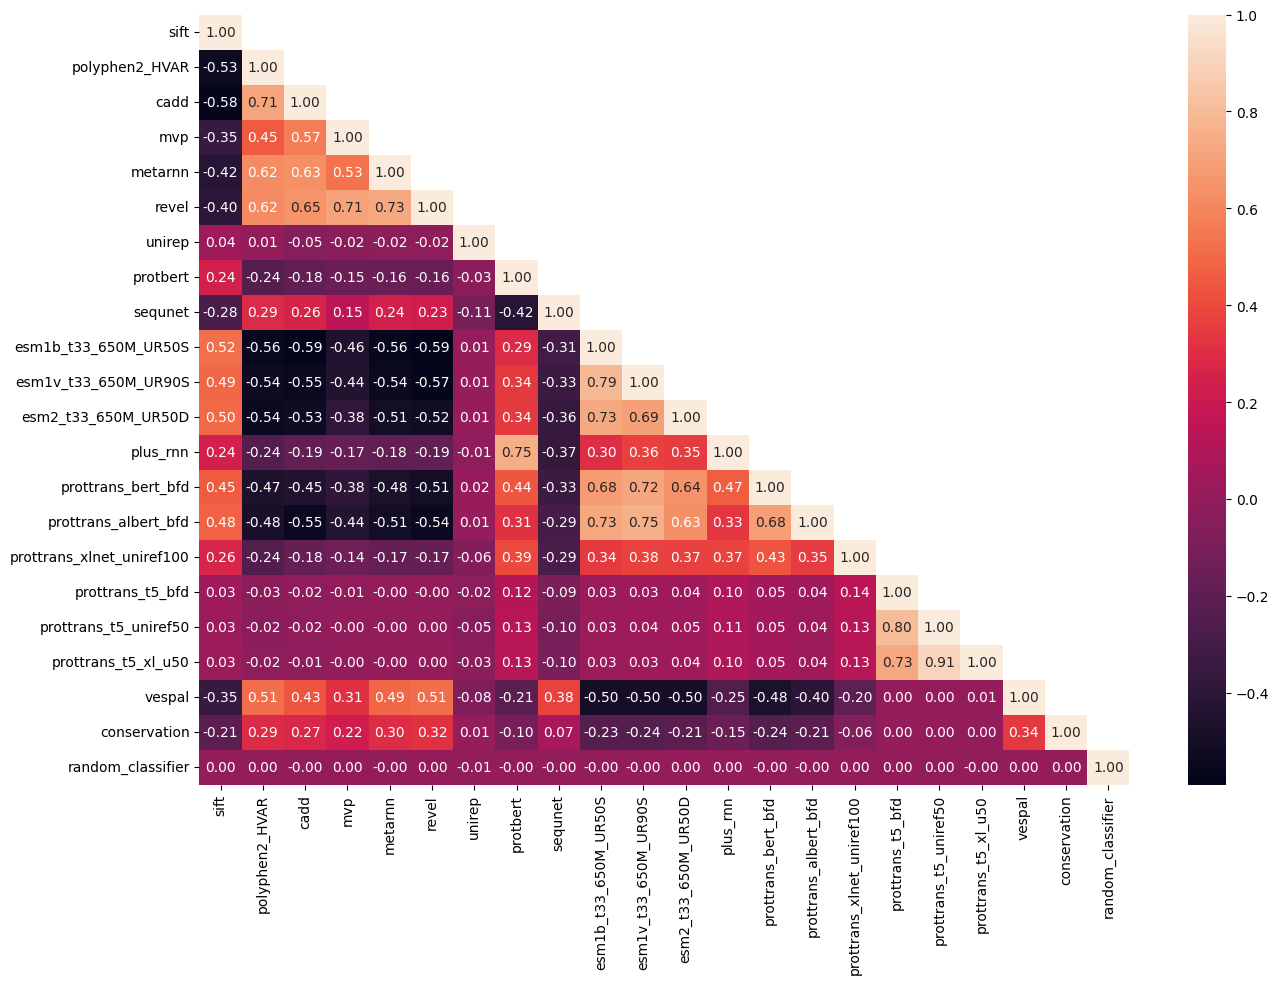

In [9]:
model_names = {col:col[:-5] for col in columns}
selected_cols_result_df.rename(columns=model_names, inplace=True)

corr= selected_cols_result_df.corr()

mask = np.triu(np.ones_like(corr))
np.fill_diagonal(mask, False)

plt.figure(figsize=(15,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", mask=mask)
# plt.show()
plt.savefig(home_dir+f"models/aa_common/models_scores_pcc_plot/corr_methods_scores_popu_freq.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)